# Overview
BikeEase is a New York-based urban mobility company providing bike rental services across the city. The company offers flexible bike rental options to both residents and tourists, aiming to encourage eco-friendly transportation.

BikeEase plans to leverage AI/ML capabilities to optimize operations, predict demand, and improve user experience. The goal is to build an intelligent analytics platform that helps understand rental patterns, seasonal trends, and operational efficiency.

The new platform will focus on:

Demand Forecasting Engine: Predict rental demand based on historical data and external factors such as weather and seasons
Operational Optimization Engine: Helps manage bike distribution and maintenance schedules
User Behavior Analysis: Understand customer preferences and optimize marketing campaigns
Visualization Toolkit: Provides insights through interactive dashboards for better decision-making
Project Statement

Develop an end-to-end solution for data aggregation, cleaning, processing, and visualization using the provided bike rental dataset. The goal is to extract actionable insights to enhance decision-making capabilities.

Create a comprehensive data processing and visualization solution to analyze the bike rental dataset, identify trends, and provide valuable business insights to BikeEase.

# Objective:

To analyze the given bike rental dataset using Python and relevant libraries to perform data import, cleaning, processing, statistical analysis, and visualization

# Task: 
Based on rented bike count, the hour of the day, the day's temperature, humidity, wind speed, rainfall, holidays, and many other factors, build a model to predict the bike count required each hour for a stable supply of rental bikes.

## Dataset columns 

Date: The date when the data was recorded

Rented Bike Count: The number of bikes rented during the given hour

Hour: The hour of the day (0-23)

Temperature(°C): The recorded temperature in Celsius

Humidity(%): The relative humidity percentage

Wind speed (m/s): Wind speed measured in meters per second

Visibility (10m): Visibility recorded in units of 10 meters

Dew point temperature(°C): The dew point temperature in Celsius

Solar Radiation (MJ/m2): The amount of solar radiation received

Rainfall(mm): The recorded rainfall in millimeters

Snowfall (cm): The recorded snowfall in centimeters

Seasons: The season when the data was collected (e.g., Winter, Spring, Summer, Fall)

Holiday: Whether the day was a holiday or not

Functioning Day: Indicates whether the bike rental service was operational on that day

## Load the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

df = pd.read_csv('FloridaBikeRentals.csv', encoding="ISO-8859-1")

## Check for null values in any columns and handle the missing values

In [3]:
def inspect_data(sample):
    print(sample.info())
    print(sample.describe().T)
    print(sample.columns)
    print(sample.sample(3))
inspect_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
def clean_data(sample):
    if sample.duplicated().sum() == 0:
        print(f"No duplicates found in Data")
    if sample.duplicated().sum() > 0:
        num_dup = sample.duplicated().sum()
        sample.drop_duplicates(inplace = True)
        print(f'{num_dup} duplicates were dropped from dataset') 
    for col in sample:
        if sample[col].isnull().sum() > 0:
            mean_value = df[col].mean()
            print(f"Filling missing values in '{col}' with mean value: {mean_value:.2f}")
            sample[col].fillna(mean_value, inplace=True)
        if sample[col].isnull().sum() == 0:
            print(f"No missing values in {col}")
clean_data(df)

No duplicates found in Data
No missing values in Date
No missing values in Rented Bike Count
No missing values in Hour
No missing values in Temperature(°C)
No missing values in Humidity(%)
No missing values in Wind speed (m/s)
No missing values in Visibility (10m)
No missing values in Dew point temperature(°C)
No missing values in Solar Radiation (MJ/m2)
No missing values in Rainfall(mm)
No missing values in Snowfall (cm)
No missing values in Seasons
No missing values in Holiday
No missing values in Functioning Day


## Convert Date columns to Date format and extract day, month, day of week, and weekdays/weekend from date column

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format="mixed")

df['Month'] = df['Date'].dt.month
df['Day_of_week'] = df['Date'].dt.dayofweek
df['Day'] = df['Date'].dt.day
df['weekend'] = df['Day_of_week'].apply(lambda x: 1 if x > 4 else 0)
df['weekday'] = df['Day_of_week'].apply(lambda x: 1 if x < 5 else 0)
df=df.drop(columns=['Date','Day', 'Day_of_week'],axis=1)


## Check correlation of features using heatmap

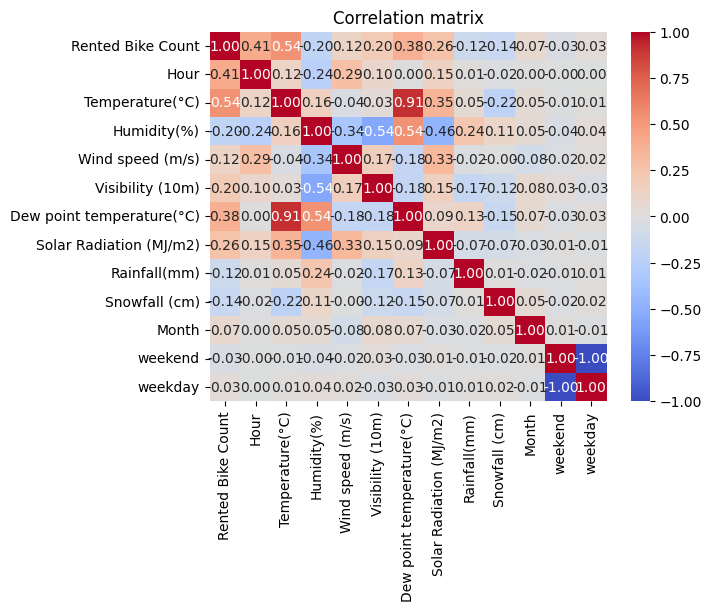

In [6]:
# Calculate correlation matrix for numeric columns only
correlation_matrix = df.select_dtypes(include='number').corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

### Observations:
1. There are moderate positive correlations between rented bike and temperature.
2. Conversely there are weak negative correlations between precipitation weather-related phenomenon, specifically rainfall and snowfall


## Plot the distribution plot of Rented Bike Count

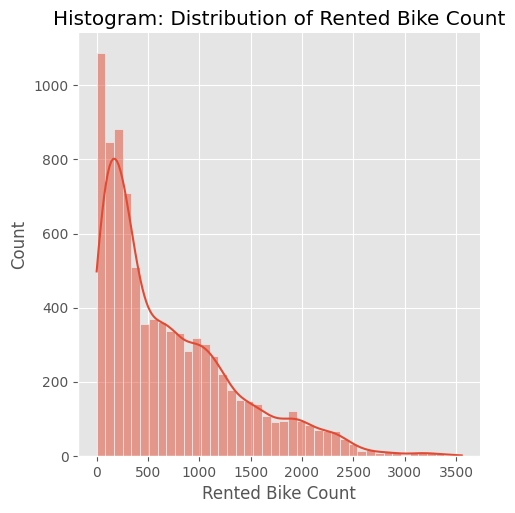

In [7]:
plt.style.use('ggplot')
sns.displot(df['Rented Bike Count'], bins='auto', kde=True)
plt.title('Histogram: Distribution of Rented Bike Count')
plt.show()

### Observations

Majority of the rented bike counts are on the lower-end <500, illustrating more of right-skewing of the distribution

## Plot the histogram of all numerical features


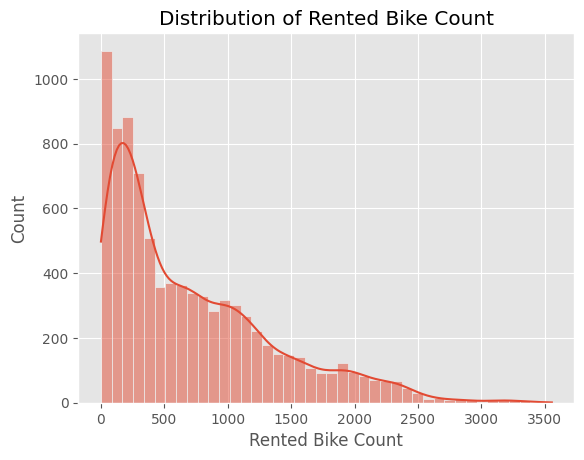

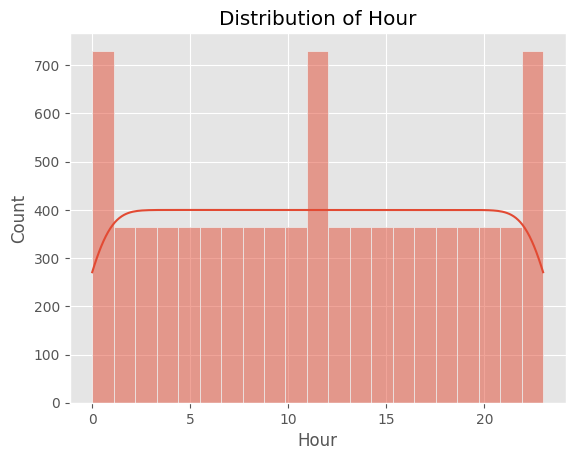

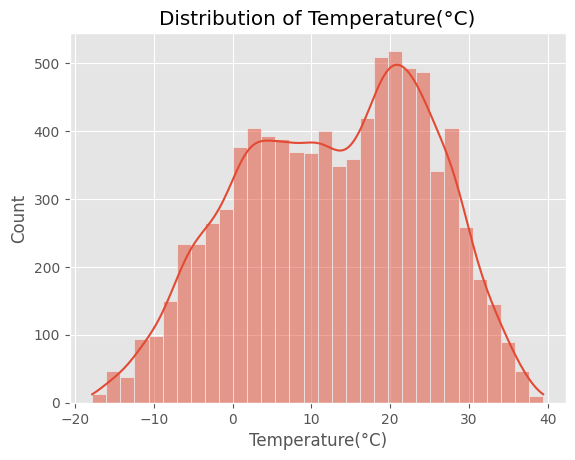

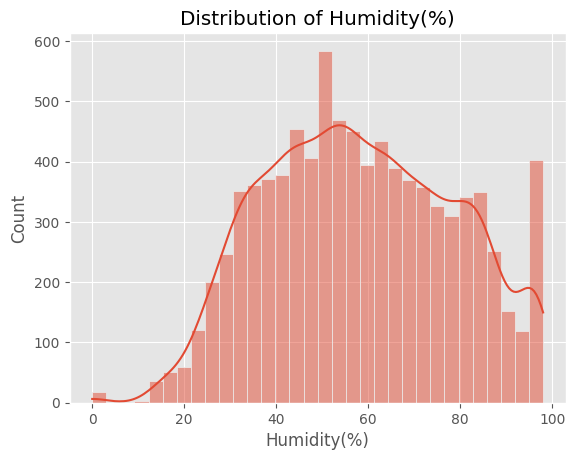

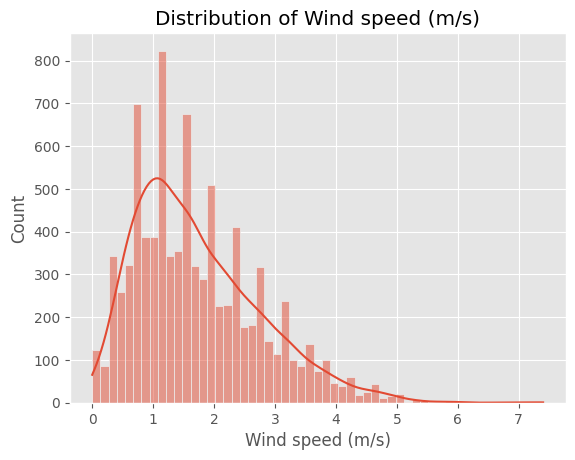

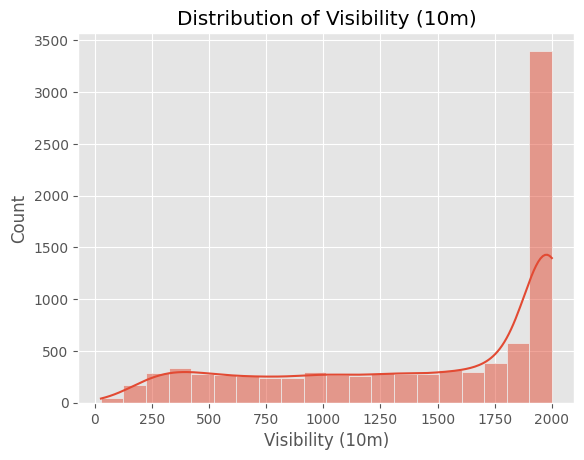

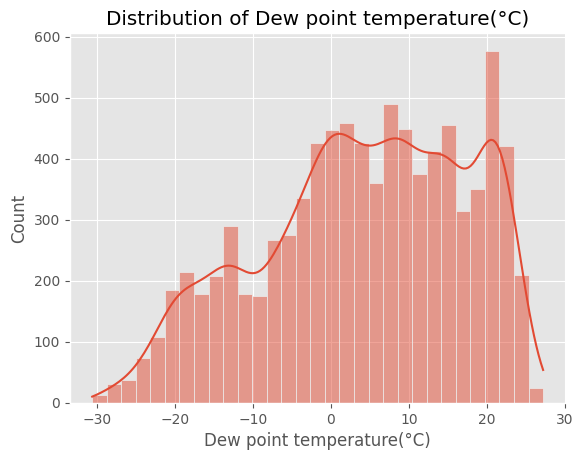

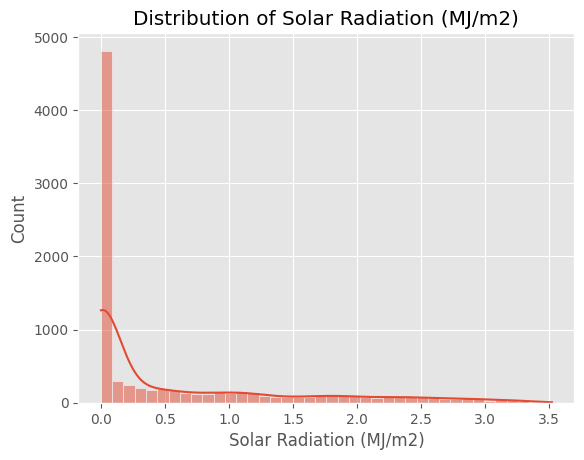

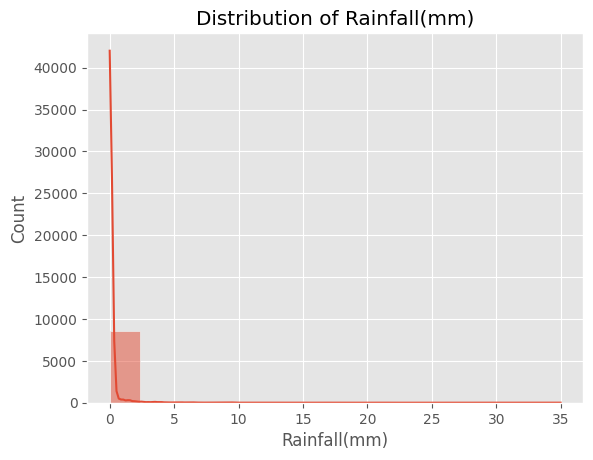

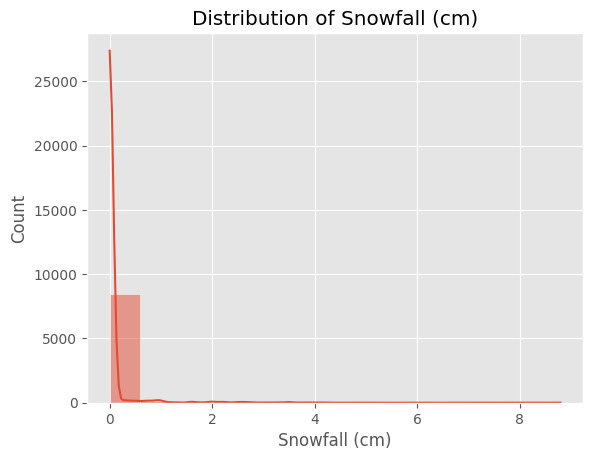

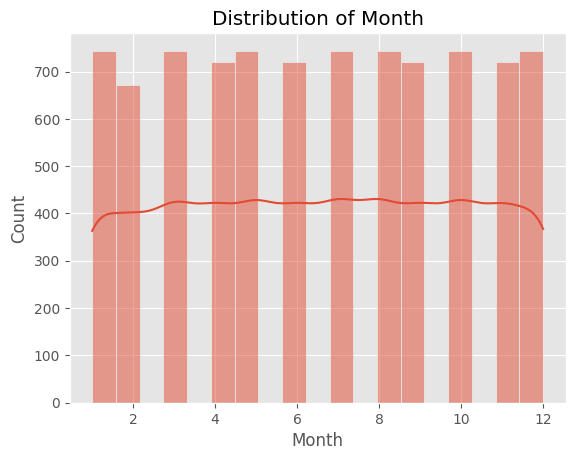

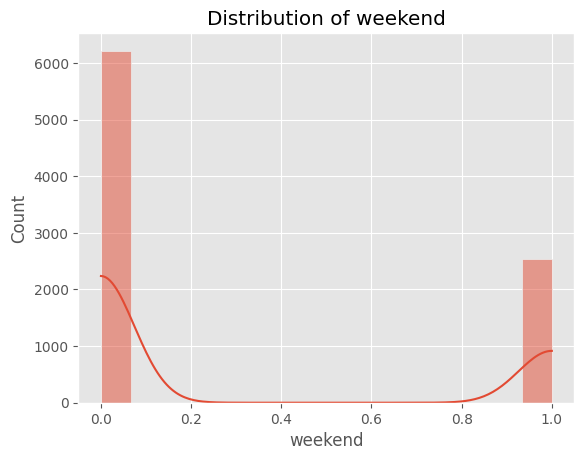

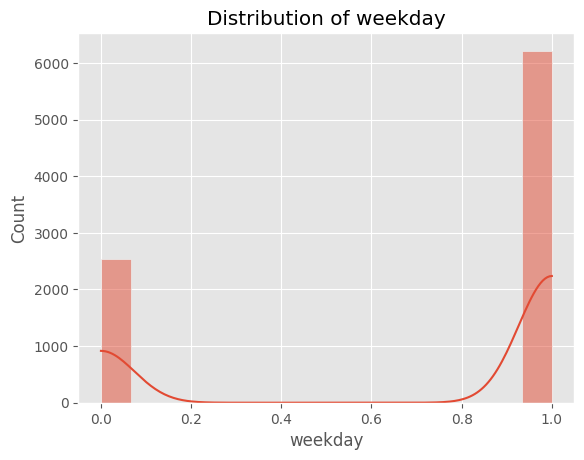

In [8]:
num_columns = df.select_dtypes(include=np.number).columns
for column in num_columns:
    sns.histplot(df[column], kde=True)
    plt.style.use('ggplot')
    plt.title(f"Distribution of {column}")
    plt.show()

### Observations

There does not seem to be any notable unexpected distributions of the numerical data, overall showing favorable weather/conditions and no significant insights with temporal data

## Plot the box plot of Rented Bike Count against all the categorical features (Hint: Categorical features on X-axis and  Rented Bike Count on Y-axis)

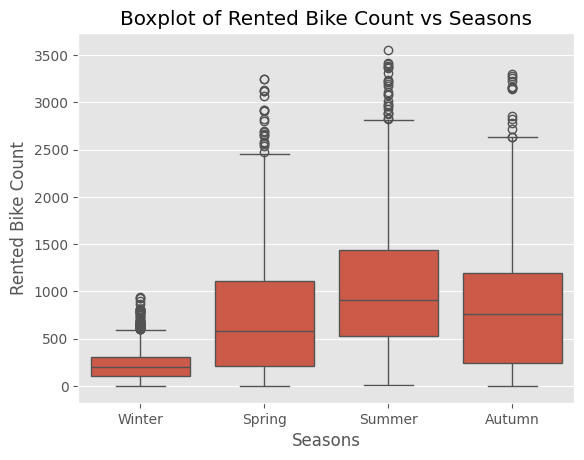

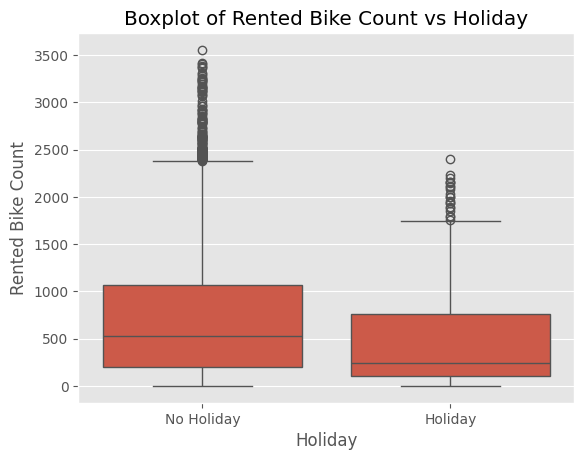

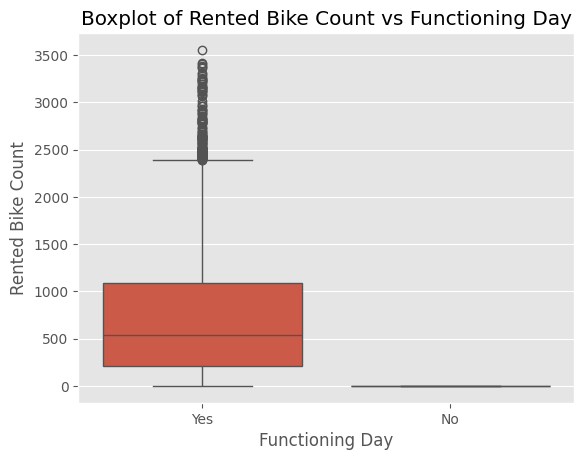

In [9]:
categorical_features = df.select_dtypes(include='object')
for category in categorical_features:
    sns.boxplot(x=df[category], y=df['Rented Bike Count'])
    plt.title(f"Boxplot of Rented Bike Count vs {category}")
    plt.show()

### Observations

1. Additionally the box plots show higher means of rented bikes during the summer and non-holidays

2. Some outliers seen are on functioning days there are sales >2400 rented bikes. For our sake we will not be removing outliers to focus on the overall goal is to maximize sales

## Plot the Seaborn catplot of Rented Bike Count against features like Hour, Holiday, Rainfall (mm), Snowfall (cm), weekdays, weekend, and give your inferences.

<Figure size 2000x2000 with 0 Axes>

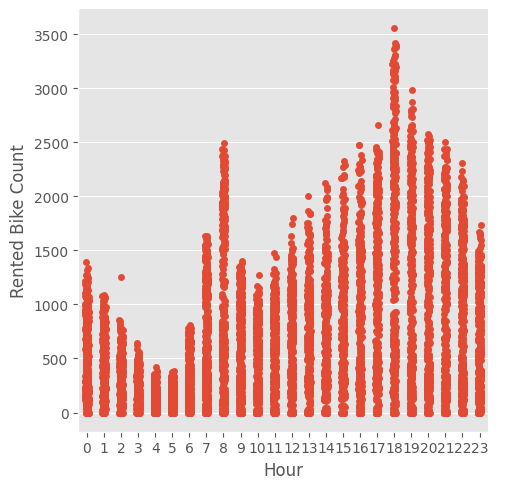

<Figure size 2000x2000 with 0 Axes>

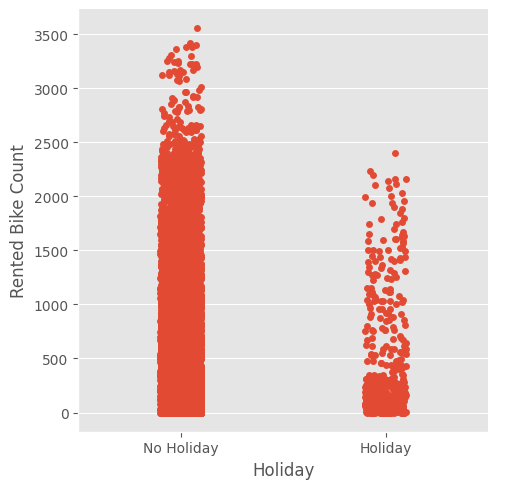

<Figure size 2000x2000 with 0 Axes>

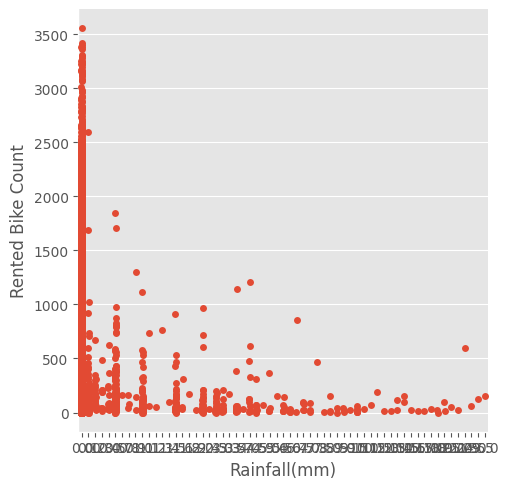

<Figure size 2000x2000 with 0 Axes>

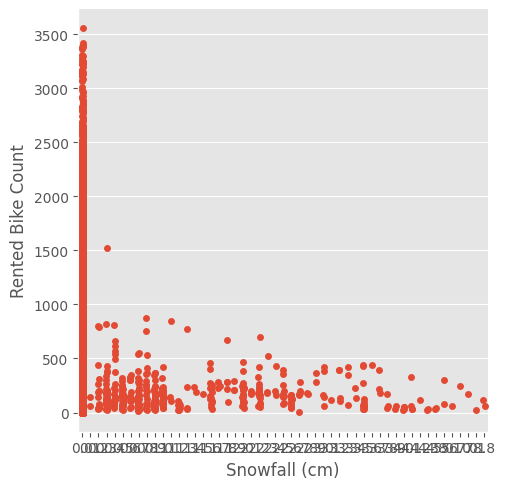

<Figure size 2000x2000 with 0 Axes>

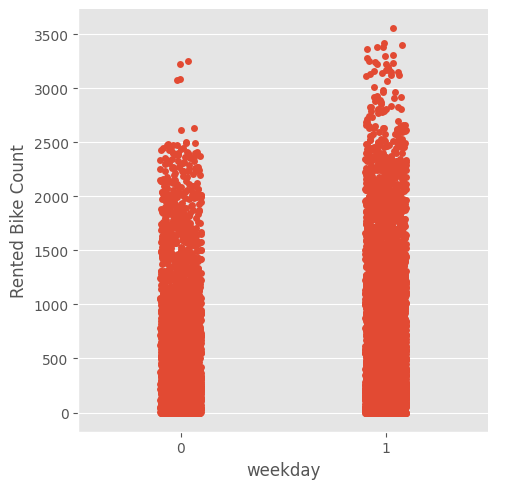

<Figure size 2000x2000 with 0 Axes>

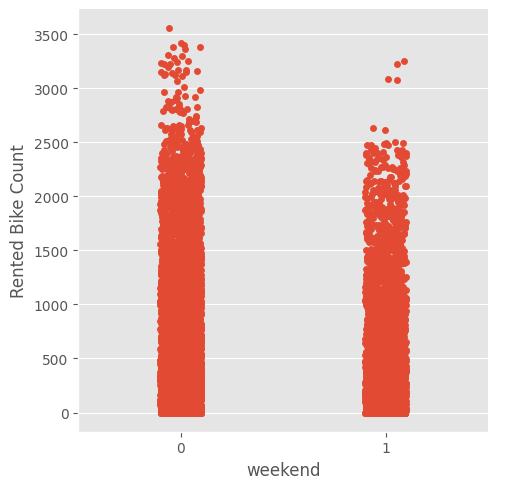

In [10]:
feature_list=['Hour', 'Holiday', 'Rainfall(mm)','Snowfall (cm)', 'weekday', 'weekend']
for feature in feature_list:
    plt.figure(figsize=(10,10),dpi=200)
    sns.catplot(x=feature, y='Rented Bike Count', data=df)
    plt.show()

### Observations

Count plots show there is less demand during winter season and rainy days

## Encode the categorical features into numerical features. 
(Hint: use get_dummies())

In [11]:
dummies = pd.get_dummies(df[['Seasons', 'Holiday', 'Functioning Day']], dtype=int, prefix='dumb', drop_first=True)
dummies.head()

,dumb_Spring,dumb_Summer,dumb_Winter,dumb_No Holiday,dumb_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1


In [12]:
y=df['Rented Bike Count']

In [13]:
y = df['Rented Bike Count']
X_numerical = df.drop(['Rented Bike Count', 'Seasons', 'Holiday', 'Functioning Day'], axis=1).astype(float)
list_numerical = X_numerical.columns
list_numerical

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'weekend', 'weekday'],
      dtype='object')

In [14]:
X = pd.concat([X_numerical, dummies], axis=1)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       8760 non-null   float64
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   float64
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   float64
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Month                      8760 non-null   float64
 10  weekend                    8760 non-null   float64
 11  weekday                    8760 non-null   float64
 12  dumb_Spring                8760 non-null   int64  
 13  dumb_Summer                8760 non-null   int64

## Identify the target variable and split the dataset into train and test with a ratio of 80:20 and random state 1

In [15]:
# Split dataset into train and test (80:20) with random state 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Perform Standard Scaling of the train dataset.

In [16]:
# Perform Standard Scaling on train dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Perform Linear Regression, Lasso Regression, and Ridge Regression to predict the bike count required each hour and compare the results.

In [17]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Lasso Regression Model
lasso_model = Lasso(alpha=1, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

def perform_model(name, y_true, y_pred):
    print(f"\n{name} Model Performance:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R-squared (R2 Score): {r2_score(y_true, y_pred):.2f}")

perform_model("Linear Regression", y_test, y_pred_linear)
perform_model("Lasso Regression", y_test, y_pred_lasso)
perform_model("Ridge Regression", y_test, y_pred_ridge)


Linear Regression Model Performance:
Mean Absolute Error (MAE): 321.84
Mean Squared Error (MSE): 187707.22
Root Mean Squared Error (RMSE): 433.25
R-squared (R2 Score): 0.55

Lasso Regression Model Performance:
Mean Absolute Error (MAE): 321.36
Mean Squared Error (MSE): 187424.68
Root Mean Squared Error (RMSE): 432.93
R-squared (R2 Score): 0.55

Ridge Regression Model Performance:
Mean Absolute Error (MAE): 321.83
Mean Squared Error (MSE): 187690.46
Root Mean Squared Error (RMSE): 433.23
R-squared (R2 Score): 0.55


## Check performance Train vs Test Data

In [21]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    print(f"\n{name} Model Performance:")
    print(f"Train MAE: {train_mae:.2f} | Test MAE: {test_mae:.4f}")
    print(f"Train R² Score: {r2_score(y_train, y_train_pred):.4f} | Test R² Score: {r2_score(y_test, y_test_pred):.4f}")
    
# Evaluate all models
evaluate_model("Linear Regression", linear_model, X_train_scaled, y_train, X_test_scaled, y_test)
evaluate_model("Lasso Regression", lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)
evaluate_model("Ridge Regression", ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)


Linear Regression Model Performance:
Train MAE: 323.13 | Test MAE: 321.8393
Train R² Score: 0.5524 | Test R² Score: 0.5458

Lasso Regression Model Performance:
Train MAE: 323.22 | Test MAE: 321.3575
Train R² Score: 0.5523 | Test R² Score: 0.5465

Ridge Regression Model Performance:
Train MAE: 323.14 | Test MAE: 321.8255
Train R² Score: 0.5524 | Test R² Score: 0.5459


In [19]:
# Compare performance
models = ["Linear Regression", "Lasso Regression", "Ridge Regression"]
r2_scores = [r2_score(y_test, y_pred_linear), r2_score(y_test, y_pred_lasso), r2_score(y_test, y_pred_ridge)]

/var/folders/q9/tcnkwbxn3pv75_gj_6zrz_c80000gn/T/ipykernel_5639/3113244086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette="coolwarm")


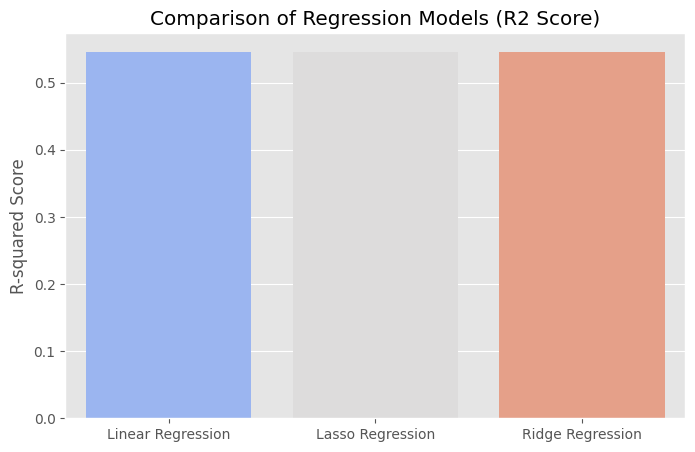

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=r2_scores, palette="coolwarm")
plt.title("Comparison of Regression Models (R2 Score)")
plt.ylabel("R-squared Score")
plt.show()

## Conclusions

1. There are futher demands for rented bikes during Summer season and non-holidays

2. There are higher demands for rented bikes early morning and evening, likely due to work commutes

3. Temperature, time of day, and humidity are the most important features positively influencing bike rentals

4. Linear, Lasso, and Ridge models yielded relatively similar results with lasso model showing slightly more favorable R2 by .001